In [32]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings("ignore")

import sys 
import numpy as np 
import random as rn
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler


In [33]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time

# Importing the data

In [34]:
df = pd.read_csv('household_power_consumption.txt', sep=';',low_memory=False, na_values=["?"], parse_dates={"datetime": ["Date", "Time"]}, infer_datetime_format=True)

Features Information:

DateTime : Date and Time combined in format dd/mm/yyyy hh:mm:ss
global_active_power : household global minute-averaged active power (in kilowatt). Active power is the power that is consumed.
global_reactive_power : Household global minute-averaged reactive power (in kilowatt). Reactive power is the unsed power in the lines
voltage : Minute-averaged voltage (in volt)
global_intensity : Household global minute-averaged current intensity (in ampere)
sub_metering_1 : Energy sub-metering No. 1 (in watt-hour of active energy). It corresponds to the kitchen, containing mainly a dishwasher, an oven and a microwave (hot plates are not electric but gas powered).
sub_metering_2 : Energy sub-metering No. 2 (in watt-hour of active energy). It corresponds to the laundry room, containing a washing-machine, a tumble-drier, a refrigerator and a light.
sub_metering_3 : Energy sub-metering No. 3 (in watt-hour of active energy). It corresponds to an electric water-heater and an air-conditioner.

# Exploratory Data Analysis

In [35]:
df.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [36]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 8 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   datetime               datetime64[ns]
 1   Global_active_power    float64       
 2   Global_reactive_power  float64       
 3   Voltage                float64       
 4   Global_intensity       float64       
 5   Sub_metering_1         float64       
 6   Sub_metering_2         float64       
 7   Sub_metering_3         float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 126.7 MB


In [37]:
df.describe()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2075259,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,2008-12-06 07:12:59.999994112,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
min,2006-12-16 17:24:00,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2007-12-12 00:18:30,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008-12-06 07:13:00,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,2009-12-01 14:07:30,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,2010-11-26 21:02:00,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01
std,NaN,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00


In [38]:
df.isna().sum()

datetime                     0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

# Dealing with missing values 'nan' with a test statistic

In [39]:

for _ in df.columns:
    df[_].fillna(df[_].median(), inplace=True)

In [40]:
df.isnull().sum()

datetime                 0
Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [41]:
df.shape

(2075259, 8)

# Data visulaization

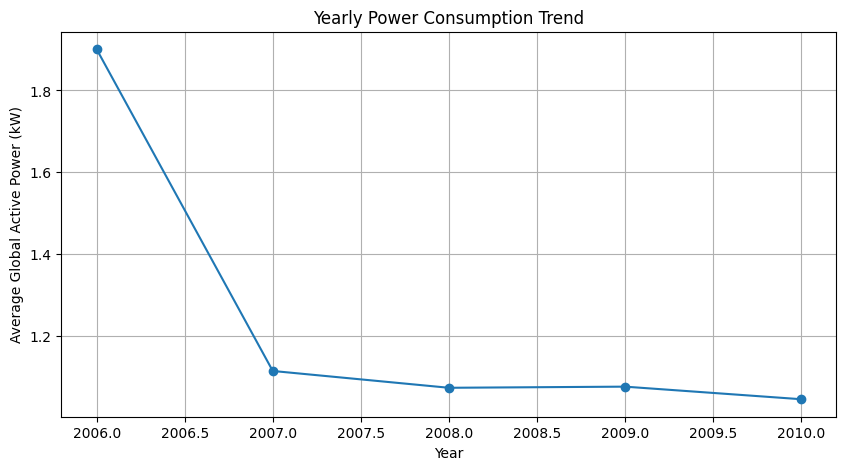

In [42]:
# Group by year and calculate the average power consumption
yearly_trend = df.groupby(df["datetime"].dt.year)["Global_active_power"].mean()

# Plot
plt.figure(figsize=(10,5))
yearly_trend.plot(kind="line", marker="o", title="Yearly Power Consumption Trend")
plt.xlabel("Year")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

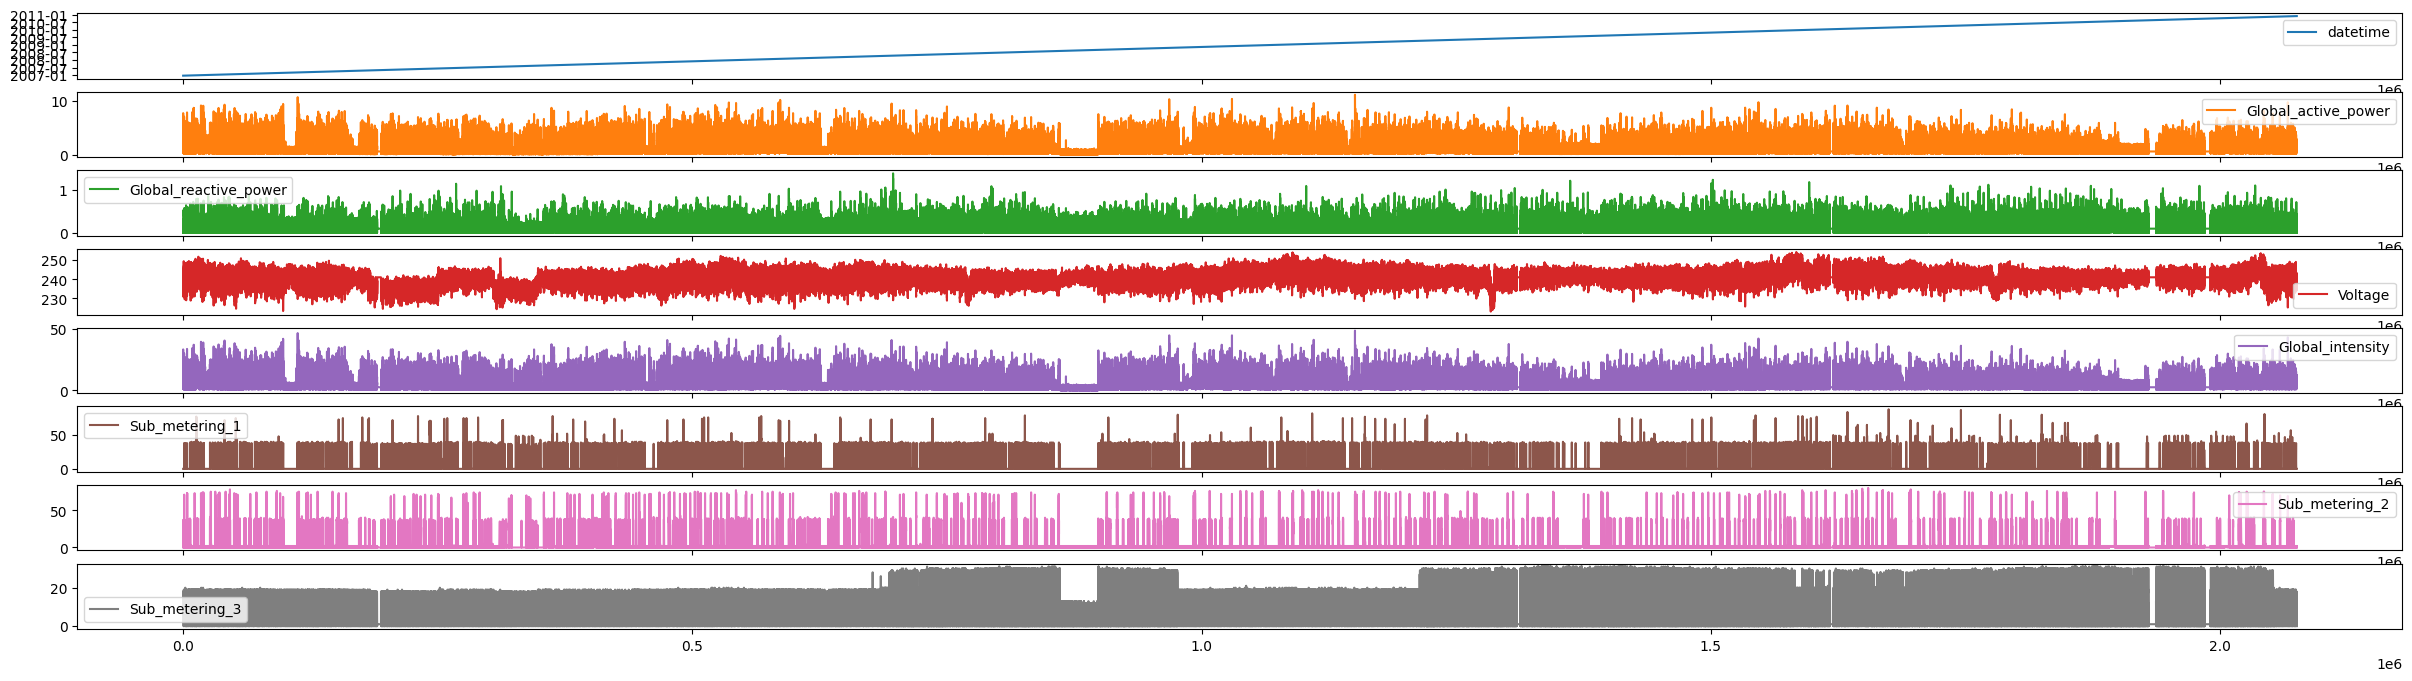

In [43]:
df.plot(subplots=True, figsize=(30,8))
plt.show()

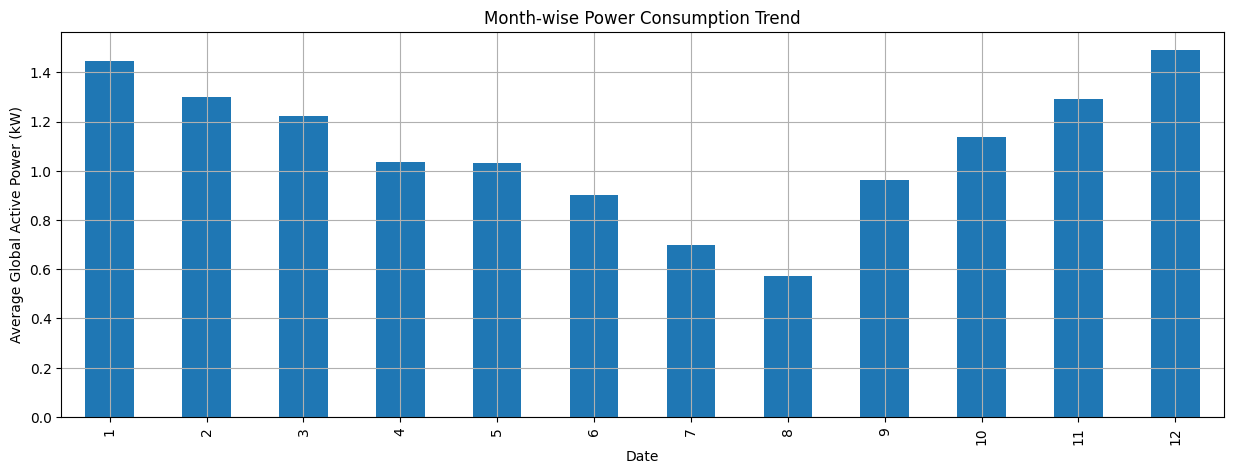

In [44]:
monthly_trend = df.groupby(df["datetime"].dt.month)["Global_active_power"].mean()

# Plot
plt.figure(figsize=(15, 5))
monthly_trend.plot(kind="bar", title="Month-wise Power Consumption Trend")
plt.xlabel("Date")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

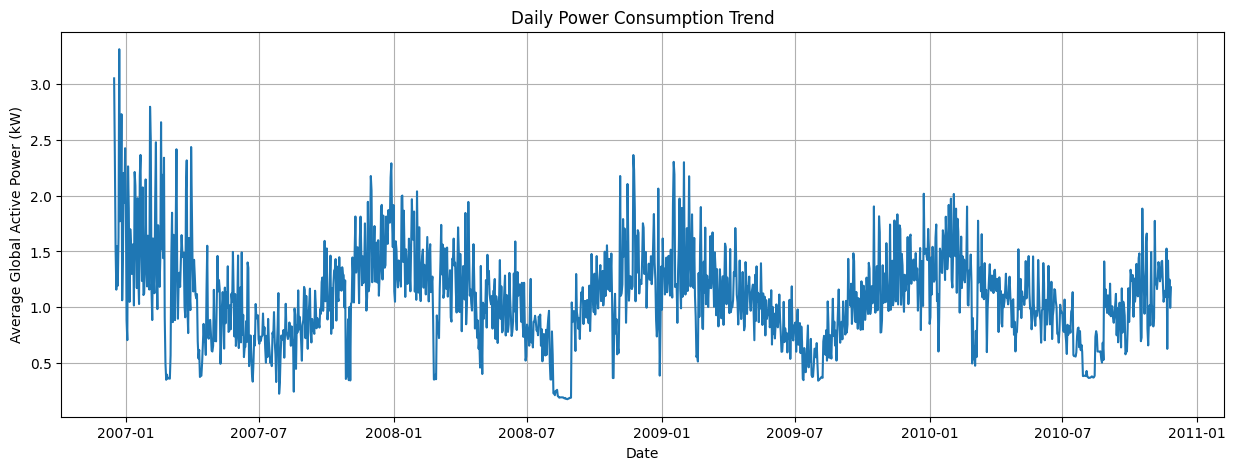

In [45]:
daily_trend = df.groupby(df["datetime"].dt.date)["Global_active_power"].mean()

# Plot
plt.figure(figsize=(15, 5))
daily_trend.plot(kind="line", title="Daily Power Consumption Trend")
plt.xlabel("Date")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

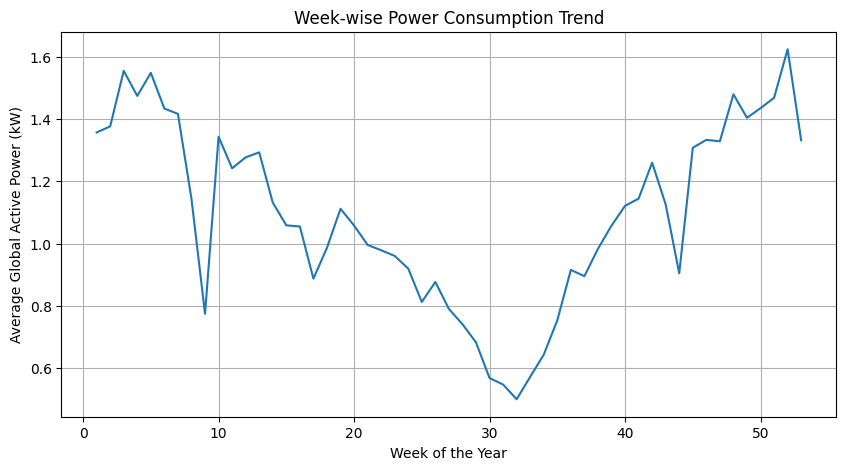

In [46]:
weekly_trend = df.groupby(df["datetime"].dt.isocalendar().week)["Global_active_power"].mean()

# Plot
plt.figure(figsize=(10, 5))
weekly_trend.plot(kind="line", title="Week-wise Power Consumption Trend")
plt.xlabel("Week of the Year")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

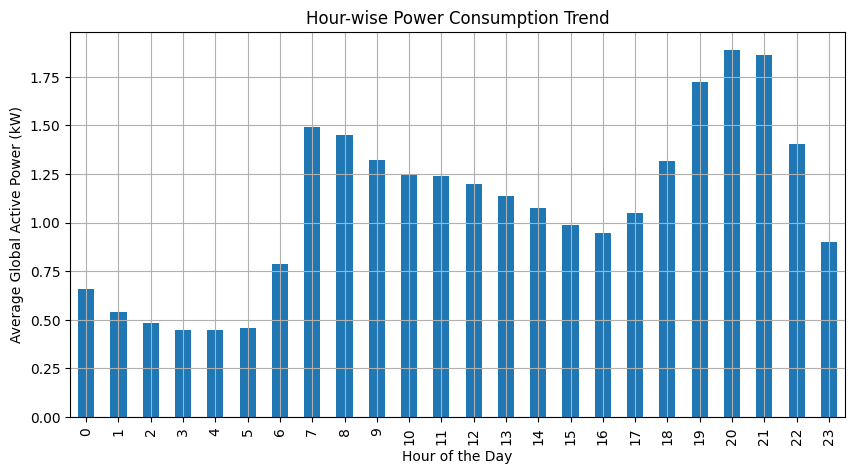

In [47]:
hourly_trend = df.groupby(df["datetime"].dt.hour)["Global_active_power"].mean()

# Plot
plt.figure(figsize=(10, 5))
hourly_trend.plot(kind="bar", title="Hour-wise Power Consumption Trend")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Global Active Power (kW)")
plt.grid()
plt.show()

# Data resampling visualization--formulate the data on hourly, daily or monthly basis etc.


In [48]:
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["day"] = df["datetime"].dt.day
df["hour"] = df["datetime"].dt.hour

In [49]:
df.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,hour
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17


# Correlation Study

In [50]:
df.corr()



,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,hour
datetime,1.000000,-0.046043,0.050750,0.247252,-0.049896,-0.016063,-0.039809,0.047010,0.968193,0.161902,-0.001903,0.000054
Global_active_power,-0.046043,1.000000,0.247835,-0.399523,0.998891,0.484707,0.435142,0.639772,-0.038757,-0.031928,-0.001160,0.279787
Global_reactive_power,0.050750,0.247835,1.000000,-0.112351,0.266900,0.123531,0.139736,0.091057,0.044340,0.027341,-0.000784,0.127203
Voltage,0.247252,-0.399523,-0.112351,1.000000,-0.411121,-0.196051,-0.167496,-0.267892,0.252606,-0.015191,0.023778,-0.175040
Global_intensity,-0.049896,0.998891,0.266900,-0.411121,1.000000,0.489600,0.440909,0.627776,-0.042931,-0.030707,-0.001714,0.280163
Sub_metering_1,-0.016063,0.484707,0.123531,-0.196051,0.489600,1.000000,0.055201,0.103755,-0.014327,-0.007265,-0.006547,0.107915
Sub_metering_2,-0.039809,0.435142,0.139736,-0.167496,0.440909,0.055201,1.000000,0.082437,-0.037890,-0.009456,0.002096,0.086773
Sub_metering_3,0.047010,0.639772,0.091057,-0.267892,0.627776,0.103755,0.082437,1.000000,0.054883,-0.029820,-0.005257,0.113203
year,0.968193,-0.038757,0.044340,0.252606,-0.042931,-0.014327,-0.037890,0.054883,1.000000,-0.089253,-0.028265,-0.000696
month,0.161902,-0.031928,0.027341,-0.015191,-0.030707,-0.007265,-0.009456,-0.029820,-0.089253,1.000000,0.020129,0.000216


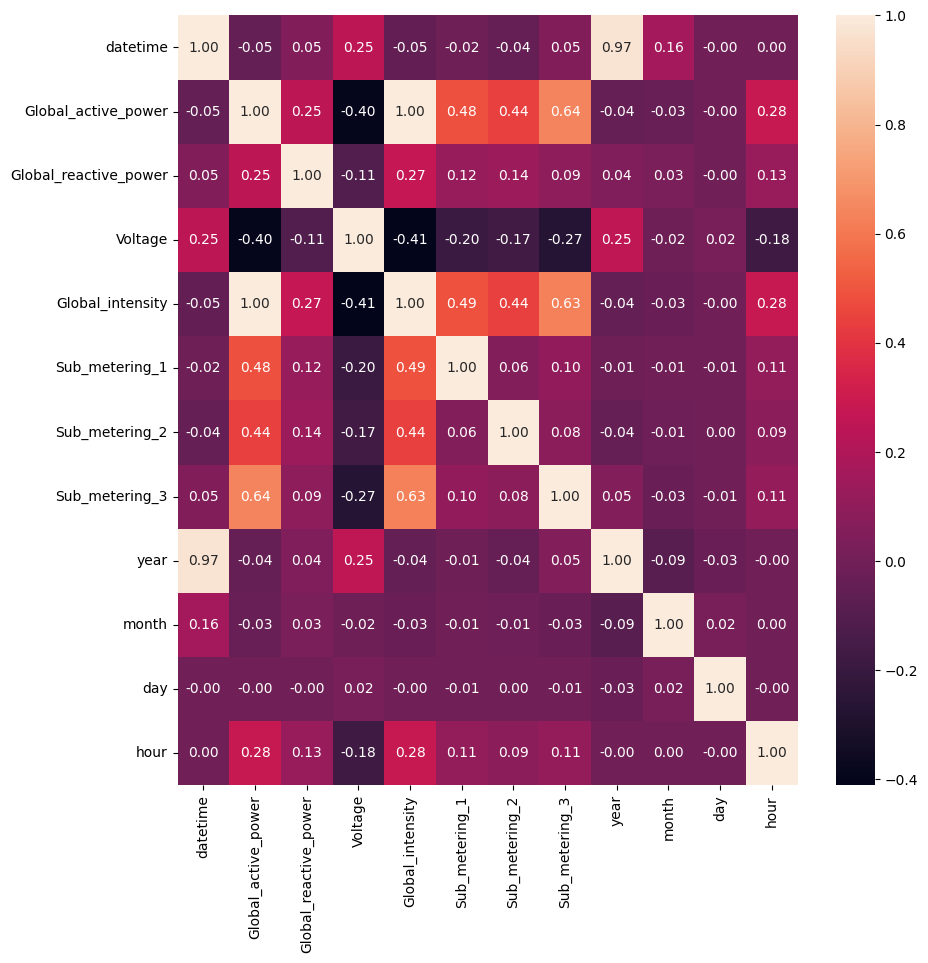

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()

# Analysis :

It is observed that as we increase the resampling criteria from hour to month :
1 - There is a drop in seasonal periodicity pattern.
2 - The distribution is becoming close to normal (not exactly normal) for some features.
3 - An increase in correlation is observed between features.


Creating additional Features:

Daily Average,
Peak Hour,
and Rolling Average 


In [52]:
# Daily Average

daily_average = df.groupby(df["datetime"].dt.date)["Global_active_power"].mean()
df["daily_average"] = df["datetime"].dt.date.map(daily_average)

In [53]:
# Peak Hour

hourly_avg = df.groupby([df["datetime"].dt.date,df["datetime"].dt.hour])["Global_active_power"].sum()
peak_hour_per_day = hourly_avg.groupby(level=0).max()
df["peak_hour"] = df["datetime"].dt.date.map(peak_hour_per_day)

In [54]:
# Rolling Average

rolling_average = (df.groupby(df["datetime"].dt.date)["Global_active_power"].apply(lambda x: x.rolling(window=2, min_periods=1).mean()))
df["rolling_average"] = rolling_average.reset_index(drop=True)

In [55]:
df.head()

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,year,month,day,hour,daily_average,peak_hour,rolling_average
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,16,17,3.053475,217.932,4.216
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,16,17,3.053475,217.932,4.788
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,16,17,3.053475,217.932,5.367
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,16,17,3.053475,217.932,5.381
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,16,17,3.053475,217.932,4.527


# Feature selection using Correlation matrix and Heatmap


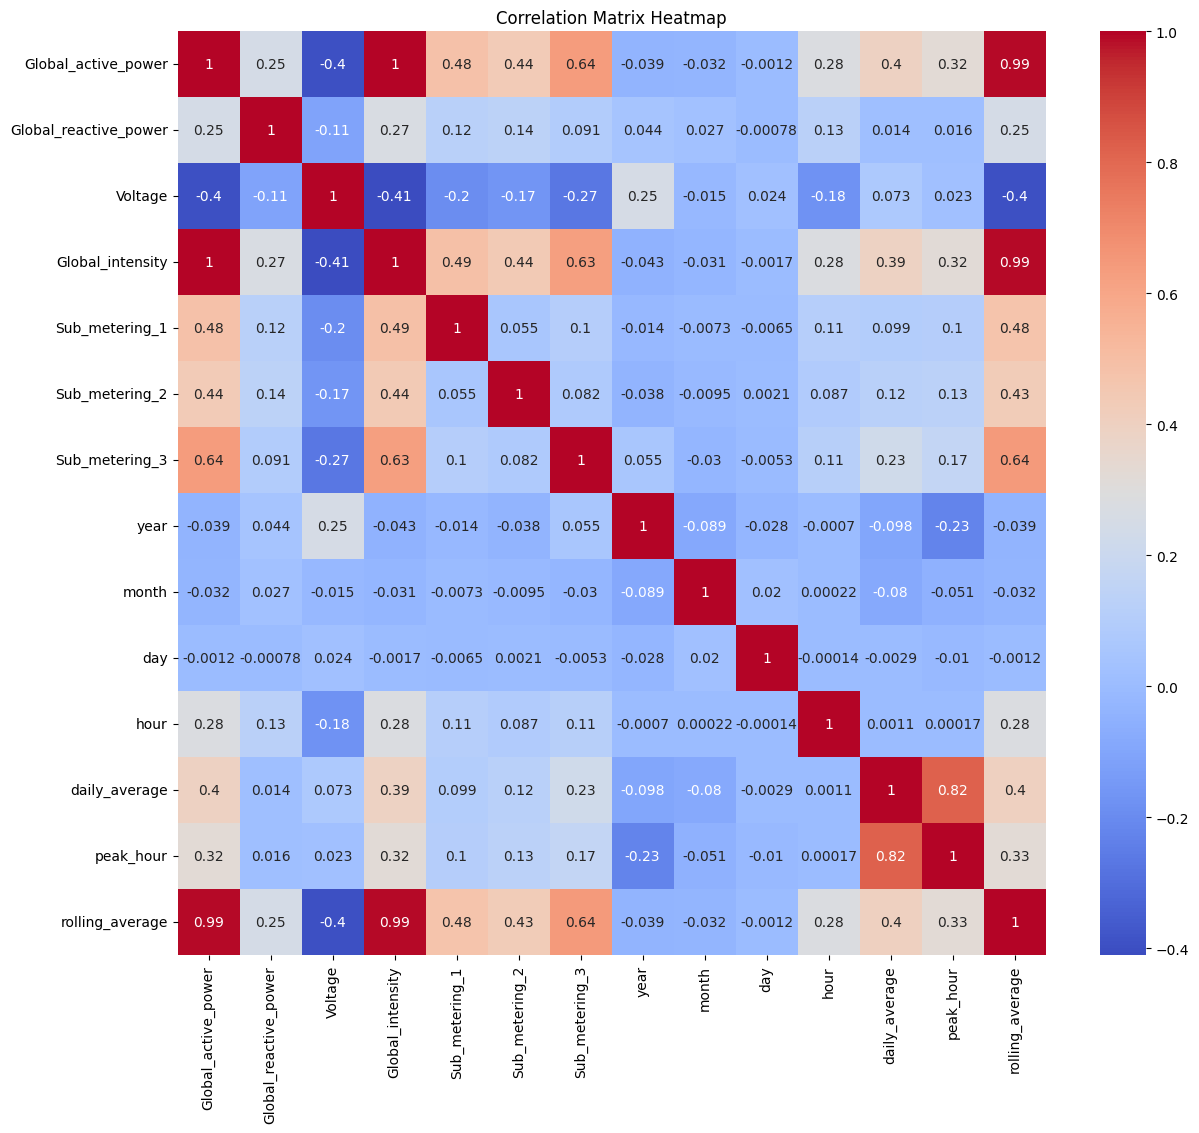

In [56]:
corr_matrix = df[["Global_active_power", "Global_reactive_power", "Voltage", "Global_intensity", "Sub_metering_1", "Sub_metering_2",
       "Sub_metering_3", "year", "month", "day", "hour", "daily_average", "peak_hour", "rolling_average"]].corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix Heatmap")
plt.show()